### Problem statement we want to predict that airline customer will loyal or disloyal using ANN

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import  confusion_matrix,classification_report

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Business travel':1,'Personal Travel':0})
df['Class'] = df['Class'].map({'Business':1,'Eco':2,'Eco Plus':3})
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0,'satisfied':1})


In [4]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0,3,0,13,460,5,4,5,25,18.0
1,1,0,1,1,0,25,235,1,3,1,1,6.0
2,0,1,1,1,1,26,1142,5,4,5,0,0.0
3,0,1,1,1,0,25,562,2,3,2,11,9.0
4,1,1,1,1,1,61,214,3,4,3,0,0.0


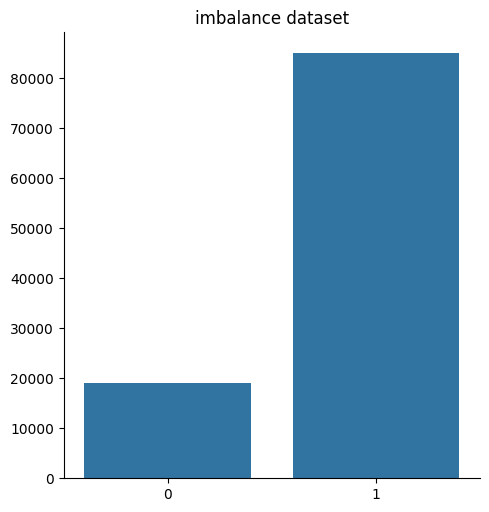

In [5]:
sns.catplot(x = list((df['Customer Type'].value_counts().keys())),y=list((df['Customer Type'].value_counts().values)),kind='bar')
plt.title('imbalance dataset')
plt.show()

In [6]:
loyal_customer = df[df['Customer Type']==1].loc[0:20000]
disloyal_customer = df[df['Customer Type']==0]

In [7]:
balance_df = pd.concat([loyal_customer,disloyal_customer])

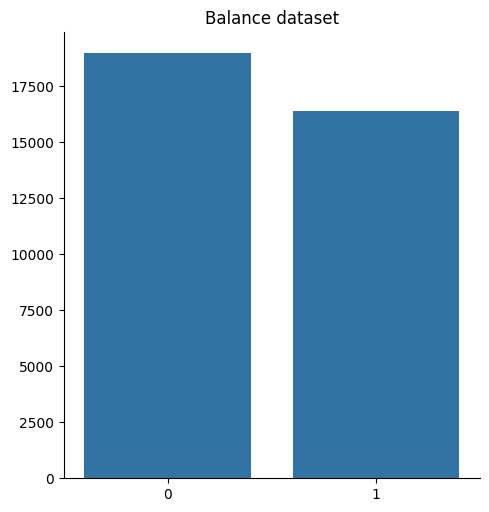

In [8]:
sns.catplot(x = list((balance_df['Customer Type'].value_counts().keys())),y=list((balance_df['Customer Type'].value_counts().values)),kind='bar')
plt.title('Balance dataset')
plt.show()

In [9]:
balance_df.isnull().sum()

Gender                         0
Customer Type                  0
Type of Travel                 0
Class                          0
satisfaction                   0
Age                            0
Flight Distance                0
Inflight entertainment         0
Baggage handling               0
Cleanliness                    0
Departure Delay in Minutes     0
Arrival Delay in Minutes      94
dtype: int64

In [10]:
null_df = balance_df[balance_df.isnull()['Arrival Delay in Minutes']]
null_df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
213,0,1,1,2,1,38,109,5,4,5,31,NaN
1124,1,1,0,2,0,53,1012,4,4,4,38,NaN
1529,1,1,1,1,0,39,733,2,2,3,11,NaN
2108,0,1,0,2,0,24,417,5,2,5,1,NaN
2485,0,1,0,2,1,28,2370,3,4,3,3,NaN


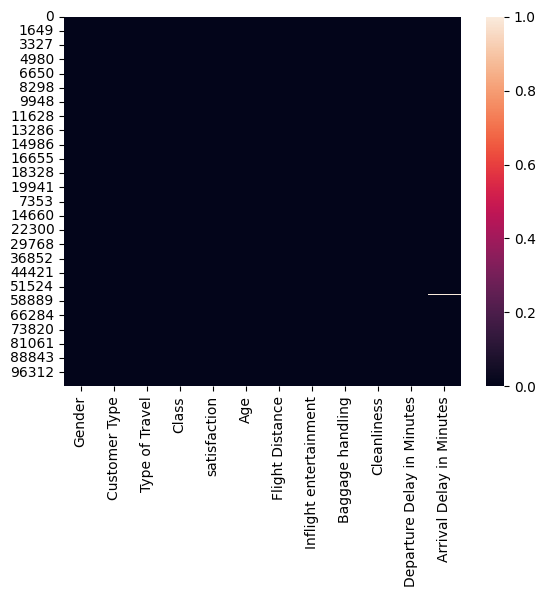

In [11]:
sns.heatmap(balance_df.isnull())
plt.show()
# to visualaize the represenatation of missing value

In [12]:
balance_df.dropna().isnull().sum()
## null free data

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [13]:
null_free_df = balance_df.dropna()

In [14]:
x = null_free_df.drop('Customer Type',axis=1)
y = null_free_df[['Customer Type']]

In [15]:
x.shape ,y.shape

((35269, 11), (35269, 1))

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

### Standard Scaling the Dataset

In [17]:
from sklearn.preprocessing import  StandardScaler
st_scaler = StandardScaler()

In [18]:
x_train_scaled = st_scaler.fit_transform(x_train)
x_test_scaled  = st_scaler.transform(x_test)

## We are importing all the necessary library for build ANN

In [19]:
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import  Sequential

In [20]:
x_train_scaled.shape,    y_train.shape   # shape of the Dataset

((28215, 11), (28215, 1))

In [21]:
### Defining ANN Model

Ann_Model = Sequential()
# Hidden layers
Ann_Model.add(Dense(units=68,activation='relu',input_dim=x_train_scaled.shape[1]))
Ann_Model.add(Dense(units=32,activation='relu'))
Ann_Model.add(Dense(units=24,activation='relu'))
Ann_Model.add(Dense(units=12,activation='relu'))
#output layers
Ann_Model.add(Dense(units=1,activation='sigmoid'))

#compiling the models
Ann_Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
Ann_Model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 68)                816       
                                                                 
 dense_1 (Dense)             (None, 32)                2208      
                                                                 
 dense_2 (Dense)             (None, 24)                792       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 1)                 13        
                                                                 
Total params: 4129 (16.13 KB)
Trainable params: 4129 (16.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history = Ann_Model.fit(x_train_scaled, y_train, epochs=15,validation_data=(x_test_scaled,y_test))

Epoch 1/15


882/882 [==============================] - 7s 5ms/step - loss: 0.2767 - accuracy: 0.8949 - val_loss: 0.2479 - val_accuracy: 0.9037
Epoch 2/15
882/882 [==============================] - 3s 3ms/step - loss: 0.2331 - accuracy: 0.9103 - val_loss: 0.2358 - val_accuracy: 0.9105
Epoch 3/15
882/882 [==============================] - 3s 3ms/step - loss: 0.2225 - accuracy: 0.9139 - val_loss: 0.2316 - val_accuracy: 0.9124
Epoch 4/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2163 - accuracy: 0.9155 - val_loss: 0.2216 - val_accuracy: 0.9149
Epoch 5/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2106 - accuracy: 0.9194 - val_loss: 0.2187 - val_accuracy: 0.9168
Epoch 6/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2059 - accuracy: 0.9205 - val_loss: 0.2142 - val_accuracy: 0.9192
Epoch 7/15
882/882 [==============================] - 3s 4ms/step - loss: 0.2015 - accuracy: 0.9232 - val_loss: 0.2132 - val_accuracy: 0.9196
Epoc

In [25]:
training_details = pd.DataFrame(history.history)
training_details

,loss,accuracy,val_loss,val_accuracy
0,0.276694,0.894879,0.247905,0.903743
1,0.233070,0.910331,0.235786,0.910547
2,0.222468,0.913911,0.231615,0.912390
3,0.216293,0.915506,0.221605,0.914942
4,0.210587,0.919440,0.218744,0.916785
5,0.205854,0.920503,0.214197,0.919195
6,0.201502,0.923161,0.213198,0.919620
7,0.197245,0.924473,0.208218,0.920896
8,0.193896,0.926564,0.211115,0.919620
9,0.191742,0.926599,0.206380,0.923022


<Axes: >

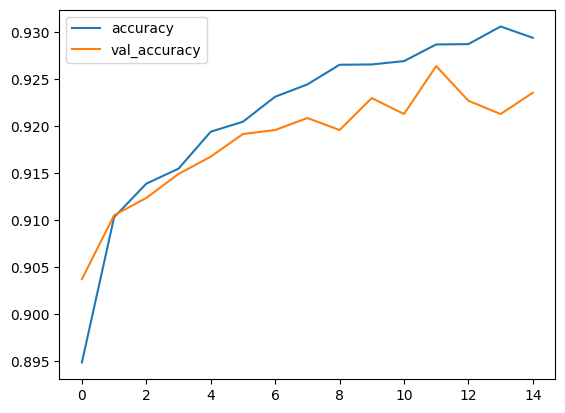

In [30]:
training_details[['accuracy','val_accuracy']].plot()

In [35]:
y_pred = Ann_Model.predict(x_test_scaled)

221/221 [==============================] - 1s 2ms/step


In [37]:
y_pred.shape

(7054, 1)

In [38]:
y_test.shape

(7054, 1)

In [40]:
y_test.head(10)

,Customer Type
75471,0
91473,0
3204,1
4875,1
18000,1
17765,1
91256,0
57088,0
24453,0
4114,1


In [42]:
y_pred[0:10]

array([[0.00514171],
       [0.02352295],
       [0.99899507],
       [0.9734056 ],
       [0.98808104],
       [0.99861294],
       [0.03633576],
       [0.02613509],
       [0.4919715 ],
       [0.9931734 ]], dtype=float32)

In [46]:
prediction = (y_pred >0.5).astype(int).ravel()

In [47]:
from sklearn.metrics import confusion_matrix ,classification_report

In [48]:
confusion_matrix(y_test,prediction)

array([[3569,  211],
       [ 328, 2946]], dtype=int64)

In [49]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3780
           1       0.93      0.90      0.92      3274

    accuracy                           0.92      7054
   macro avg       0.92      0.92      0.92      7054
weighted avg       0.92      0.92      0.92      7054

